0.2


/tmp/ipykernel_277841/1109101398.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.axes.set_xticklabels(['unspliced', 'spliced'])


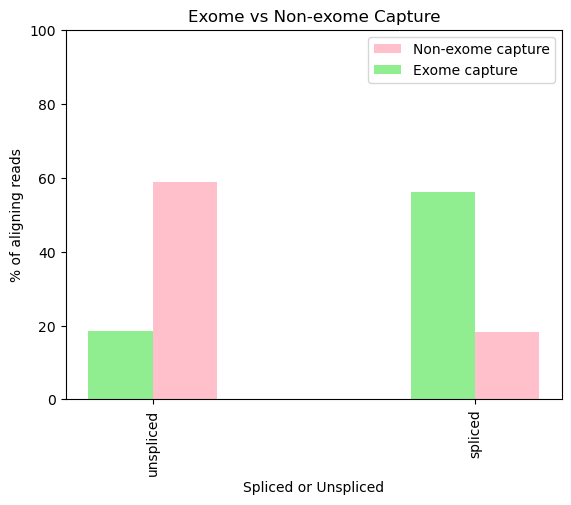

In [243]:
intron_exon_13H = [77.1-18.2, 18.2] #Using percent aligning to nascent index vs standard index
intron_exon_13G = [74.6-56.0, 56.0] #Using percent aligning to nascent index vs standard index

indices = range(2)
# Calculate optimal width
width = np.min(np.diff(indices))/5.
print(width)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(indices+width/2.,intron_exon_13H,width,color='pink',label='Non-exome capture')
ax.bar(indices-width/2.,intron_exon_13G,width,color='lightgreen',label='Exome capture')
#tiks = ax.get_xticks().tolist()
ax.axes.set_xticklabels(['unspliced', 'spliced'])
ax.set_xlabel('Spliced or Unspliced')
plt.title('Exome vs Non-exome Capture')
plt.ylim((0,100)) 
plt.xticks([0,1], ['unspliced','spliced'], rotation=90);

plt.ylabel('% of aligning reads')

plt.legend()

plt.show()

/tmp/ipykernel_61716/1646330267.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.axes.set_xticklabels(oarfish_times['dataset'])


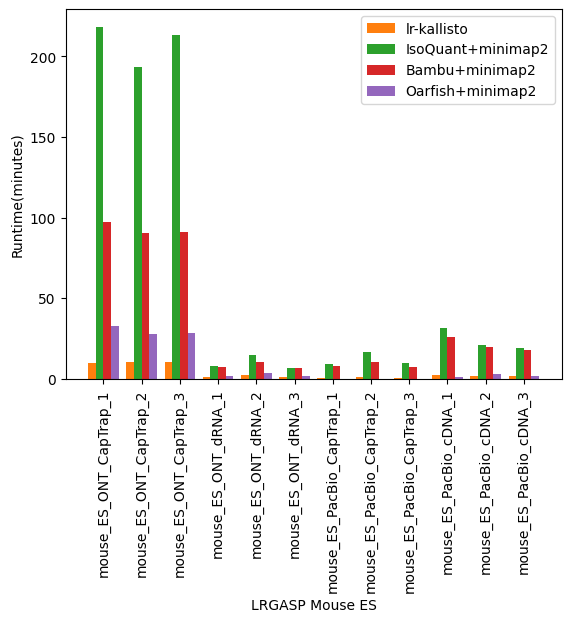

In [3]:
from matplotlib import ticker
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Tracked with python timing
oarfish_times = pd.read_csv("oarfish_times.tsv", sep='\t', names=['dataset', 'time'])
lr_kallisto_times = pd.read_csv("lr-kallisto_times.tsv", sep='\t', names=['dataset','time'])
#Calculated from logs 
IsoQuant_times = pd.read_csv("IsoQuant_times.tsv", sep='\t', names=['dataset','time'])
Bambu_times = pd.read_csv("Bambu_times.tsv", sep='\t', names=['dataset','time'])

indices = range(len(oarfish_times['dataset']))
# Calculate optimal width
width = np.min(np.diff(indices))/5.

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(indices-1.5*width,lr_kallisto_times['time'],width,color='C1',label='lr-kallisto')
ax.bar(indices-.5*width,IsoQuant_times['time'],width,color='C2',label='IsoQuant+minimap2')
ax.bar(indices+.5*width,Bambu_times['time'],width,color='C3',label='Bambu+minimap2')
ax.bar(indices+1.5*width,oarfish_times['time'],width,color='C4',label='Oarfish+minimap2')
#tiks = ax.get_xticks().tolist()
ax.axes.set_xticklabels(oarfish_times['dataset'])
ax.set_xlabel('LRGASP Mouse ES')
plt.xticks(indices, lr_kallisto_times['dataset'], rotation=90);

plt.ylabel('Runtime(minutes)')

plt.legend()

plt.show()